In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
doc_a = 'this document is first document'
doc_b = 'this document is the second document'

bag_of_words_a = doc_a.split(' ')
bag_of_words_b = doc_b.split(' ')

unique_words_set = set(bag_of_words_a).union(set(bag_of_words_b))
print(unique_words_set)

# Now create a dictionary of words and their occurence for each document in the corpus (collection of documents).

dict_a = dict.fromkeys(unique_words_set, 0)
# print(dict_a) # {'this': 0, 'document': 0, 'second': 0, 'is': 0, 'the': 0}

for word in bag_of_words_a:
    dict_a[word] += 1

print(dict_a)
# {'this': 1, 'document': 2, 'second': 1, 'is': 1, 'the': 1}

# similarly

dict_b = dict.fromkeys(unique_words_set, 0)

for word in bag_of_words_b:
    dict_b[word] += 1

print(dict_b)
# {'this': 1, 'document': 2, 'second': 1, 'is': 1, 'the': 1}

{'document', 'is', 'first', 'second', 'this', 'the'}
{'document': 2, 'is': 1, 'first': 1, 'second': 0, 'this': 1, 'the': 0}
{'document': 2, 'is': 1, 'first': 0, 'second': 1, 'this': 1, 'the': 1}


In [3]:
def compute_term_frequency(word_dictionary, bag_of_words):
    term_frequency_dictionary = {}
    length_of_bag_of_words = len(bag_of_words)

    for word, count in word_dictionary.items():
        term_frequency_dictionary[word] = count / float(length_of_bag_of_words)

    return term_frequency_dictionary

# Implementation

print(compute_term_frequency(dict_a, bag_of_words_a))

{'document': 0.4, 'is': 0.2, 'first': 0.2, 'second': 0.0, 'this': 0.2, 'the': 0.0}


In [4]:
import math

def compute_inverse_document_frequency(full_doc_list):
    idf_dict = {}
    length_of_doc_list = len(full_doc_list)

    idf_dict = dict.fromkeys(full_doc_list[0].keys(), 0)
    for word, value in idf_dict.items():
        idf_dict[word] = math.log(length_of_doc_list / (float(value) + 1))

    return idf_dict

final_idf_dict = compute_inverse_document_frequency([dict_a, dict_b])
print(final_idf_dict)

{'document': 0.6931471805599453, 'is': 0.6931471805599453, 'first': 0.6931471805599453, 'second': 0.6931471805599453, 'this': 0.6931471805599453, 'the': 0.6931471805599453}


In [5]:
# compare two embeddings

### Now implementation with sklearn

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

corpus_1 = [
     'this is sunny morning',
     'yesterday was a gloomy morning',
     'tomorrow will be rainly morning'
]

vectorizer.fit(corpus_1)

TfidfVectorizer()

In [7]:
skl_tf_idf_vectorized = vectorizer.transform(corpus_1)

# As the final output of sklearn tf-idf vectorizer is a sparse matrix to save storage space
# To visually understand the output better, we need to convert the sparse output matrix to dense matrix with toarray()
print(skl_tf_idf_vectorized.toarray())
# print(skl_tf_idf_vectorized[0])

# As above Even more clear way to visually inspect the output is to convert it to a pandas dataframe
# So below I will convert that to a dataframe and then use todense()
skl_tfdf_output = skl_tf_idf_vectorized[0]
df_tfdf_sklearn = pd.DataFrame(skl_tfdf_output.T.todense(), index=vectorizer.get_feature_names_out(), columns=['tf-idf'])
df_tfdf_sklearn.sort_values(by=["tf-idf"], ascending=True)
df_tfdf_sklearn

[[0.         0.         0.54645401 0.32274454 0.         0.54645401
  0.54645401 0.         0.         0.         0.        ]
 [0.         0.54645401 0.         0.32274454 0.         0.
  0.         0.         0.54645401 0.         0.54645401]
 [0.47952794 0.         0.         0.28321692 0.47952794 0.
  0.         0.47952794 0.         0.47952794 0.        ]]


,tf-idf
be,0.000000
gloomy,0.000000
is,0.546454
morning,0.322745
rainly,0.000000
sunny,0.546454
this,0.546454
tomorrow,0.000000
was,0.000000
will,0.000000


#### Text classification

In [8]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv', encoding='latin-1')

data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

data.columns = ['label', 'text']

data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<AxesSubplot: xlabel='label'>

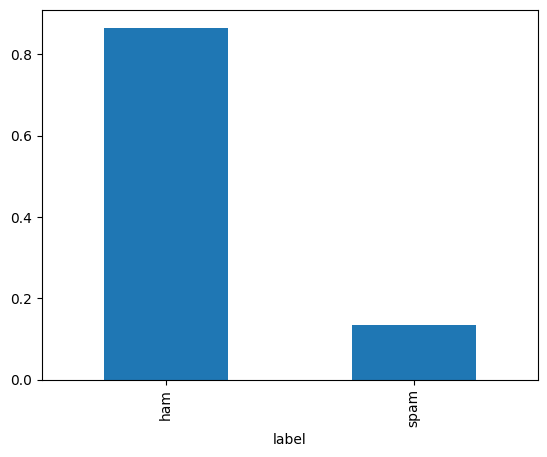

In [10]:
data['label'].value_counts(normalize = True).plot.bar()

In [11]:
!pip install nltk


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [15]:
data['lem_test'] = data['text'].apply(lambda x: lemmatizer.lemmatize(x))

X_train, X_test, y_train, y_test = train_test_split(data['lem_test'], data['label'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(X_train)

model = LogisticRegression(class_weight='balanced')
model.fit(tfidf_matrix, y_train)
y_pred = model.predict(vectorizer.transform(X_test))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.92      0.92      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115

